<a href="https://colab.research.google.com/github/Visheshkhullar/TheWebDeveloperBootcampSolutions/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import roc_auc_score as roc
from sklearn.metrics import classification_report
df = pd.read_csv("creditcard.csv")
# get to know list of features, data shape, stat. description.
print(df.shape)

print("First 5 lines:")
print(df.head(5))

print("describe: ")
print(df.describe())

print("info: ")
print(df.info())


FileNotFoundError: ignored

In [ ]:
# Determine number of fraud cases in dataset
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

0.002890173410404624
Fraud Cases: 103
Valid Transactions: 35638


In [ ]:
#details of the fraudulent transaction
fraud.Amount.describe()

count     103.000000
mean       90.471165
std       247.173335
min         0.000000
25%         1.000000
50%         3.760000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
#details of valid transaction
valid.Amount.describe()

count    35638.000000
mean        84.185241
std        227.223359
min          0.000000
25%          7.000000
50%         22.000000
75%         76.000000
max       7879.420000
Name: Amount, dtype: float64

Class as pie chart:


Text(0, 0.5, '')

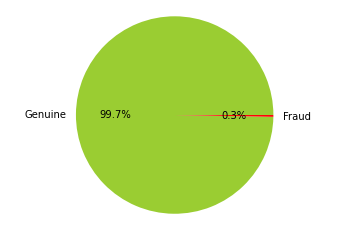

In [ ]:
# Check Class variables that has 0 value for Genuine transactions and 1 for Fraud
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

Time variable
35737    10.622222
35738    10.622222
35739    10.622500
35740    10.622500
35741    10.622500
Name: Time_Hr, dtype: float64


Text(0, 0.5, '# transactions')

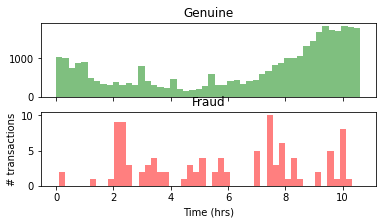

In [ ]:
#plot Time to see if there is any trend
print("Time variable")
df["Time_Hr"] = df["Time"]/3600 # convert to hours
print(df["Time_Hr"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(df.Time_Hr[df.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(df.Time_Hr[df.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

In [ ]:
df = df.drop(['Time'],axis=1)

Text(0, 0.5, '# transactions')

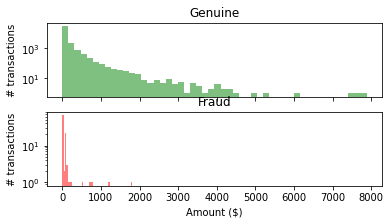

In [ ]:
#let us check another feature Amount
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(df.Amount[df.Class==0],bins=50,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(df.Amount[df.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')

In [ ]:
from sklearn.preprocessing import StandardScaler
df['scaled_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

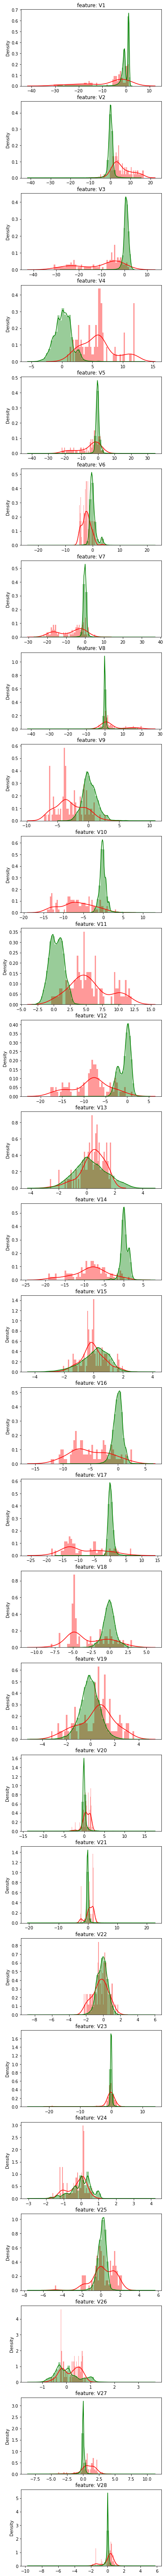

In [ ]:
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(df[df.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(df[col][df.Class == 1], bins=50, color='r')
    sns.distplot(df[col][df.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

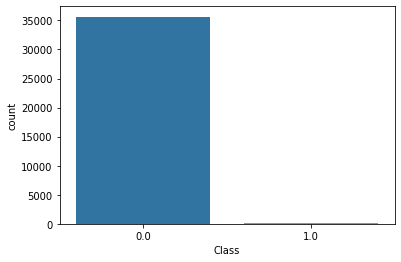

In [ ]:
#visualize the target class 'Class'
sns.countplot(x='Class', data=df)

In [ ]:
#seperating positive and negative classes
positiveDataset = df.loc[df['Class'] == 1]
negativeDataset = df.loc[df['Class'] == 0]

In [ ]:
positiveTrain, positiveTest = tts(positiveDataset, test_size=0.2, random_state=21)
negativeTrain, negativeTest = tts(negativeDataset, test_size=0.5)
trainDataset = positiveTrain.append(negativeTrain)
testDataset = positiveTest.append(negativeTest)

In [ ]:
#create Regression object and scale the dataset
classifier = GaussianNB()
yTrain = trainDataset['Class']
yTest = testDataset['Class']
xTrain = trainDataset.drop(columns=['Class'])
xTest = testDataset.drop(columns=['Class'])
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.fit_transform(xTest)

In [ ]:
#fit the dataset to the train values
classifier.fit(xTrain, yTrain)

GaussianNB()

In [ ]:
#predict the model on the train values and check results
predTrain = classifier.predict(xTrain)
print(classification_report(yTrain, predTrain))
print('ROC AUC Score: ',roc(yTrain, predTrain))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     17819
         1.0       0.16      0.88      0.27        82

    accuracy                           0.98     17901
   macro avg       0.58      0.93      0.63     17901
weighted avg       1.00      0.98      0.99     17901

ROC AUC Score:  0.928445794363101


In [ ]:
#predict test values and check results
predTest = classifier.predict(xTest)
print(classification_report(yTest, predTest))
print('ROC AUC Score: ',roc(yTest, predTest))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     17819
         1.0       0.05      0.95      0.09        21

    accuracy                           0.98     17840
   macro avg       0.52      0.97      0.54     17840
weighted avg       1.00      0.98      0.99     17840

ROC AUC Score:  0.9652190412053478


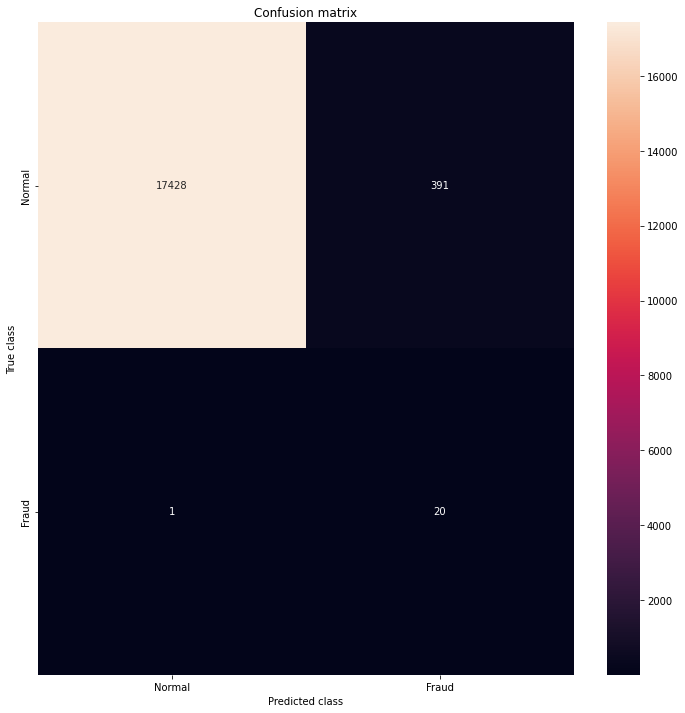

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, predTest)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()